C:\Users\Zeynep\AppData\Local\Temp\ipykernel_31000\1877383783.py:33: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Zeynep\anaconda3\envs\cmp_torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


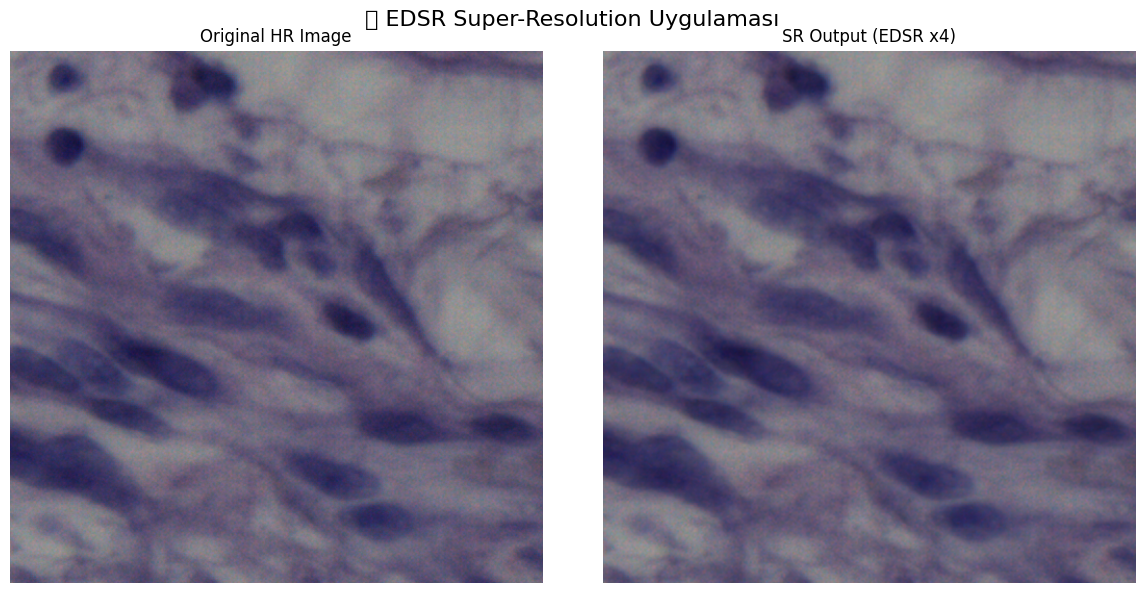

In [1]:
import cv2
import matplotlib.pyplot as plt

# 1. EDSR modelini yükle
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel("models/EDSR_x4.pb")
sr.setModel("edsr", 4)

# 2. Görseli oku
image = cv2.imread("all tissue img/human_bladder_01.png")

# 3. Super-Resolution uygula
result = sr.upsample(image)

# 4. Görseli RGB’ye çevir
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 5. Yan yana göster
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title("Original HR Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title("SR Output (EDSR x4)")
plt.axis("off")

plt.suptitle("🔍 EDSR Super-Resolution Uygulaması", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Zeynep\AppData\Local\Temp\ipykernel_31000\1877383783.py:33: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


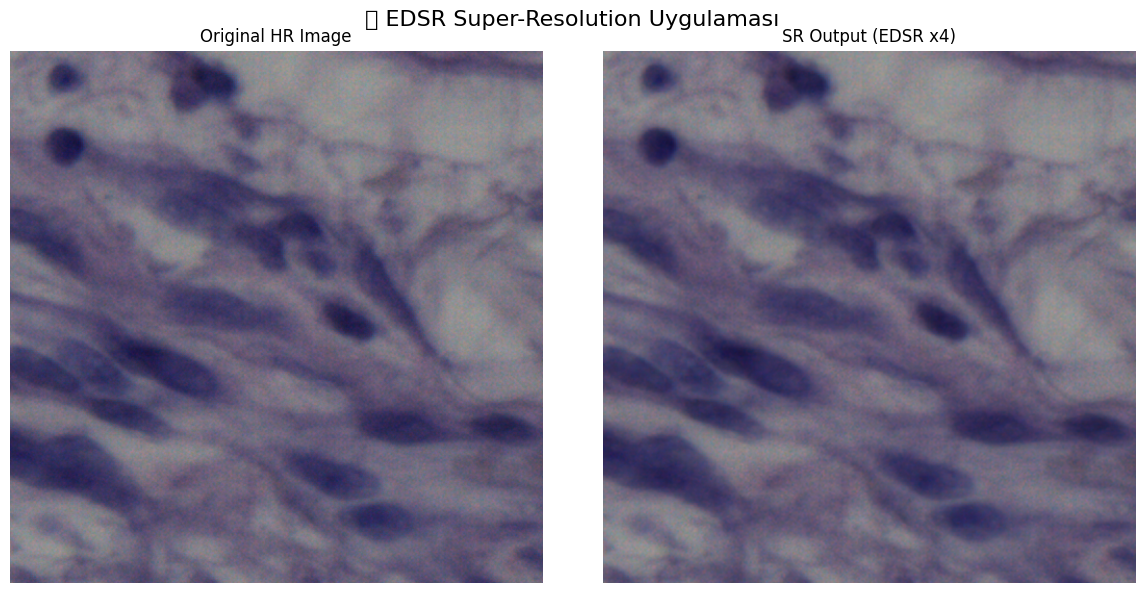

In [2]:
import cv2
import matplotlib.pyplot as plt

# 1. EDSR modelini yükle
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel("models/EDSR_x4.pb")
sr.setModel("edsr", 4)

# 2. Görseli oku
image = cv2.imread("all tissue img/human_bladder_01.png")

# 3. Super-Resolution uygula
result = sr.upsample(image)

# 4. Görseli RGB’ye çevir
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 5. Yan yana göster
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title("Original HR Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title("SR Output (EDSR x4)")
plt.axis("off")

plt.suptitle("🔍 EDSR Super-Resolution Uygulaması", fontsize=16)
plt.tight_layout()
plt.show()


In [3]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np
import cv2

# 1. Orijinal görseli yükle ve RGB’ye çevir
hr = cv2.imread("all tissue img/human_bladder_01.png")
hr_rgb = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

# 2. SR çıktıyı zaten elde ettiğini varsayıyoruz (result_rgb)

# 3. HR görüntüyü SR boyutuna getir (resize)
h, w, _ = result_rgb.shape
hr_resized = cv2.resize(hr_rgb, (w, h), interpolation=cv2.INTER_CUBIC)

# 4. Normalize et (0–1)
sr_norm = result_rgb.astype(np.float32) / 255.0
hr_norm = hr_resized.astype(np.float32) / 255.0

# 5. PSNR & SSIM hesapla
psnr = peak_signal_noise_ratio(hr_norm, sr_norm, data_range=1.0)
ssim = structural_similarity(hr_norm, sr_norm, channel_axis=2, data_range=1.0)

print(f"🔍 PSNR (EDSR): {psnr:.2f} dB")
print(f"🔍 SSIM (EDSR): {ssim:.4f}")


🔍 PSNR (EDSR): 43.11 dB
🔍 SSIM (EDSR): 0.9748
